<a href="https://colab.research.google.com/github/manyajsingh/ersilia/blob/master/eos9f6t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 30.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import csv
import os
import zipfile
import plotly.graph_objects as go
from rdkit import Chem
from rdkit.Chem import Draw
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [4]:
df1 = pd.read_csv("eml_canonical.csv")
df1.head()

,drugs,smiles,can_smiles
0,abacavir,Nc1nc(NC2CC2)c3ncn([C@@H]4C[C@H](CO)C=C4)c3n1,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1
1,abiraterone,C[C@]12CC[C@H](O)CC1=CC[C@@H]3[C@@H]2CC[C@@]4(...,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,acetazolamide,CC(=O)Nc1sc(nn1)[S](N)(=O)=O,CC(=O)Nc1nnc(S(N)(=O)=O)s1
3,acetic acid,CC(O)=O,CC(=O)O
4,acetylcysteine,CC(=O)N[C@@H](CS)C(O)=O,CC(=O)N[C@@H](CS)C(=O)O


In [7]:
print(df1.shape)
df1.info()

(442, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   drugs       442 non-null    object
 1   smiles      442 non-null    object
 2   can_smiles  442 non-null    object
dtypes: object(3)
memory usage: 10.5+ KB


In [9]:
output_df=pd.read_csv('eos9f6t_output.csv')
output_df

,key,input,activity
0,MCGSCOLBFJQGHM-SCZZXKLOSA-N,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,0.087048
1,GZOSMCIZMLWJML-VJLLXTKPSA-N,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,0.146402
2,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(=O)Nc1nnc(S(N)(=O)=O)s1,0.265368
3,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,0.251878
4,PWKSKIMOESPYIA-BYPYZUCNSA-N,CC(=O)N[C@@H](CS)C(=O)O,0.159268
...,...,...,...
437,QTXVAVXCBMYBJW-UHFFFAOYSA-N,CC(=O)CC(c1ccccc1)c1c(O)oc2ccccc2c1=O,0.533064
438,HUCJFAOMUPXHDK-UHFFFAOYSA-N,Cc1cc(C(C)(C)C)cc(C)c1CC1=NCCN1,0.141765
439,HBOMLICNUCNMMY-XLPZGREQSA-N,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,0.114183
440,NWONKYPBYAMBJT-UHFFFAOYSA-L,O=S(=O)([O-])[O-].[Zn+2],0.235779


In [16]:
import plotly.graph_objects as go

# Sort the output dataframe by probability in descending order and select the top 10
top_10_highest = output_df.sort_values(by='activity', ascending=False).head(10)

# Create text for hover information
hover_text = [''.join([f"{col}: {row[col]}" for col in top_10_highest.columns]) for index, row in top_10_highest.iterrows()]

# Create the scatter plot using Plotly
fig = go.Figure(data=go.Scatter(x=top_10_highest['key'], y=top_10_highest['activity'], mode='markers',
                                 marker=dict(color='blue', opacity=0.5),
                                 text=hover_text,
                                 hoverinfo='text'))

# Add titles and labels
fig.update_layout(title='Top 10 Molecules with Highest Probability activitys of Sars-Cov',
                  xaxis_title='Molecules',
                  yaxis_title='Probability')

# Show the plot
fig.show()


In [12]:
top_10_highest

,key,input,activity
145,WXCXUHSOUPDCQV-UHFFFAOYSA-N,CNC(=O)c1ccc(N2C(=S)N(c3ccc(C#N)c(C(F)(F)F)c3)...,0.852709
41,BVGLIYRKPOITBQ-ANPZCEIESA-N,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,0.774091
118,FMSOAWSKCWYLBB-VBGLAJCLSA-N,O=C1C=CC=C/C1=C1\N/C(=C2/C=CC=CC2=O)N(c2ccc(C(...,0.753506
96,WDQPAMHFFCXSNU-UHFFFAOYSA-N,CC(C)N=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3nc-2cc1Nc1...,0.735239
293,HHZIURLSWUIHRB-UHFFFAOYSA-N,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,0.734677
100,VNFPBHJOKIVQEB-UHFFFAOYSA-N,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,0.729271
115,NBRBXGKOEOGLOI-UHFFFAOYSA-N,COc1c(-c2ccc3cc(NS(C)(=O)=O)ccc3c2)cc(-n2ccc(=...,0.717975
429,MYPYJXKWCTUITO-UTHKAUQRSA-N,CN[C@H](CC(C)C)C(=O)NC1C(=O)N[C@@H](CC(N)=O)C(...,0.705263
78,VAAUVRVFOQPIGI-SPQHTLEESA-N,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(CSc3nc...,0.698940
66,FFGPTBGBLSHEPO-UHFFFAOYSA-N,NC(=O)N1c2ccccc2C=Cc2ccccc21,0.696952


In [17]:
import plotly.graph_objects as go

# Sort the output dataframe by probability in descending order and select the top 10
top_10_lowest = output_df.sort_values(by='activity', ascending=True).head(10)

hover_text = [''.join([f"{col}: {row[col]}" for col in top_10_lowest.columns]) for index, row in top_10_lowest.iterrows()]


# Create the scatter plot using Plotly
fig = go.Figure(data=go.Scatter(x=top_10_lowest['key'], y=top_10_lowest['activity'], mode='markers',
                                 marker=dict(color='blue', opacity=0.5),
                                 text=hover_text,
                                 hoverinfo='text'))

# Add titles and labels
fig.update_layout(title='Top 10 Molecules with Lowest Probability activitys of Sars-cov',
                  xaxis_title='Molecules',
                  yaxis_title='Probability')

# Hide x-axis ticks and labels for better visualization
# fig.update_xaxes(showticklabels=False)

# Show the plot
fig.show()

In [18]:
top_10_lowest

,key,input,activity
103,OROGSEYTTFOCAN-DNJOTXNNSA-N,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,0.052695
154,AEUTYOVWOVBAKS-UWVGGRQHSA-N,CC[C@@H](CO)NCCN[C@@H](CC)CO,0.055742
306,BRUQQQPBMZOVGD-XFKAJCMBSA-N,COc1ccc2c3c1O[C@H]1C(=O)CC[C@@]4(O)[C@@H](C2)N...,0.057212
280,BQJCRHHNABKAKU-KBQPJGBKSA-N,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H...,0.057816
201,WVLOADHCBXTIJK-YNHQPCIGSA-N,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2C(=O)CC[C@H]3[C@...,0.059145
326,QCHFTSOMWOSFHM-WPRPVWTQSA-N,CC[C@@H]1C(=O)OC[C@@H]1Cc1cncn1C,0.067844
127,BJDCWCLMFKKGEE-KXTPALSWSA-N,C[C@@H]1CC[C@H]2[C@@H](C)[C@@H](O)O[C@@H]3OC4(...,0.068204
270,IUBSYMUCCVWXPE-UHFFFAOYSA-N,COCCc1ccc(OCC(O)CNC(C)C)cc1,0.071803
26,SXYIRMFQILZOAM-HVNFFKDJSA-N,CO[C@H]1O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H](C)CC[C...,0.073675
125,RCKMWOKWVGPNJF-UHFFFAOYSA-N,CCN(CC)C(=O)N1CCN(C)CC1,0.076674


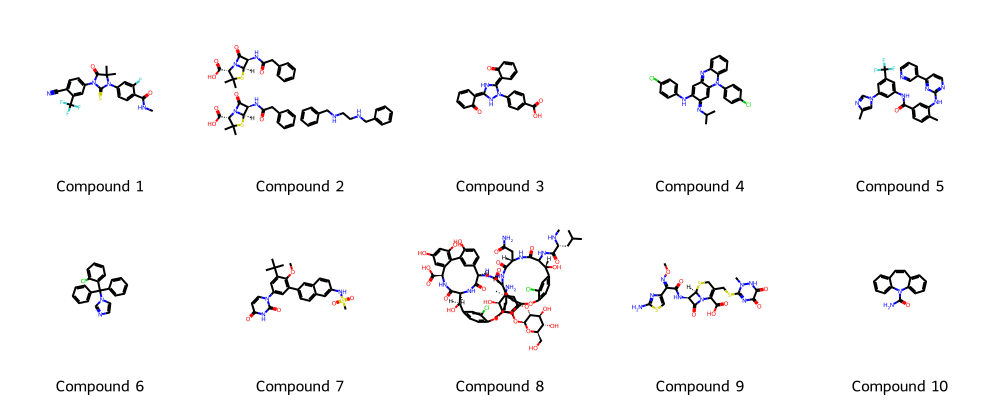

In [19]:
# List of SMILES strings of the molecules
smiles_list = top_10_highest['input']

# Convert SMILES strings to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Draw the molecules
img = Draw.MolsToGridImage(mols, molsPerRow=5,returnPNG=False, subImgSize=(200, 200), legends=[f"Compound {i+1}" for i in range(len(mols))])
# Save the image to a file
img_path = "molecules.png"
img.save(img_path)

# Display the saved image
from IPython.display import Image
Image(img_path)

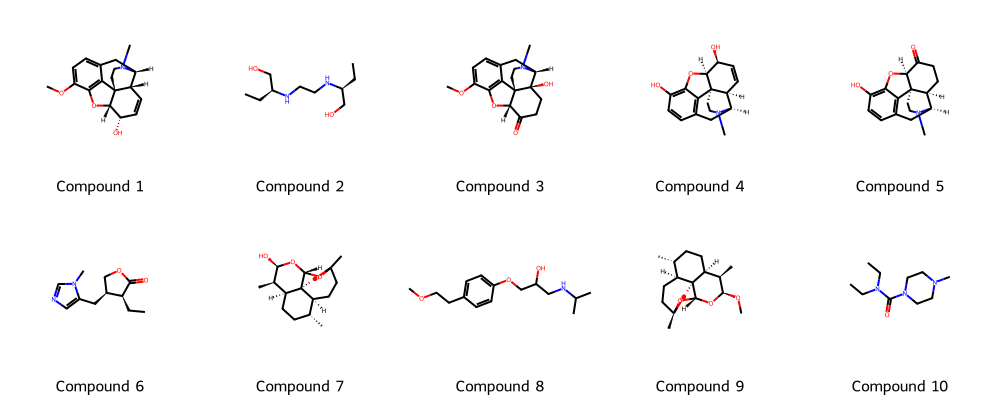

In [20]:
from rdkit import Chem
from rdkit.Chem import Draw

# List of SMILES strings of the molecules
smiles_list = top_10_lowest['input']

# Convert SMILES strings to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Draw the molecules
img = Draw.MolsToGridImage(mols, molsPerRow=5,returnPNG=False, subImgSize=(200, 200), legends=[f"Compound {i+1}" for i in range(len(mols))])
# Save the image to a file
img_path = "molecules.png"
img.save(img_path)

# Display the saved image
from IPython.display import Image
Image(img_path)

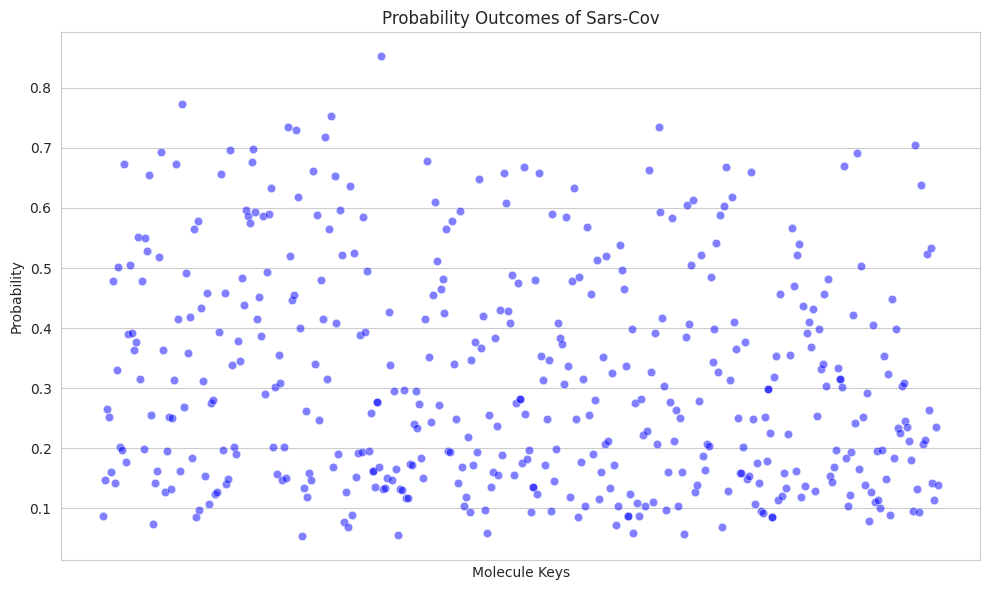

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=output_df, x='key', y='activity', color='blue', alpha=0.5)
plt.title('Probability Outcomes of Sars-Cov')
plt.xlabel('Molecule Keys')
plt.ylabel('Probability')
plt.xticks([])  # Remove x-axis ticks and labels
plt.tight_layout()
plt.show()

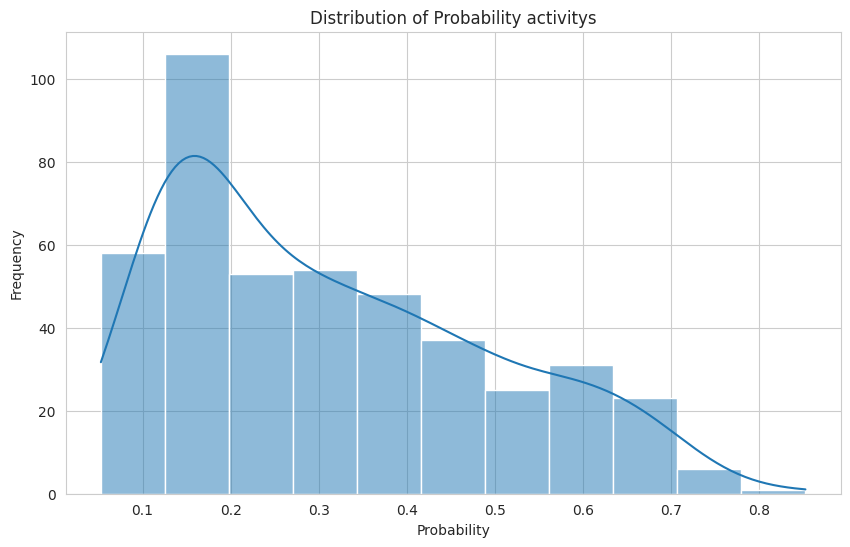

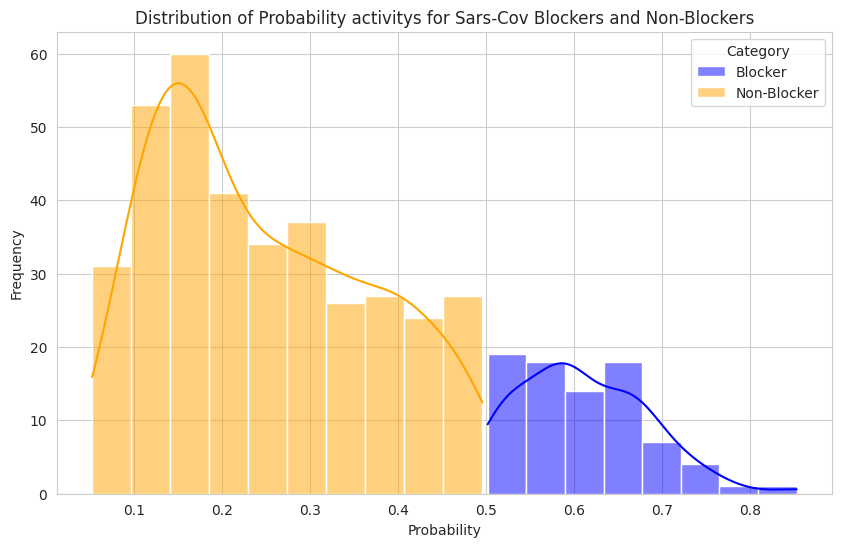

In [26]:
import seaborn as sns

# Plot the distribution of probabilities
plt.figure(figsize=(10, 6))
sns.histplot(output_df, x='activity', kde=True)
plt.title('Distribution of Probability activitys')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of probabilities for Sars-Cov blockers and non-blockers separately
threshold = 0.5
plt.figure(figsize=(10, 6))
sns.histplot(output_df[output_df['activity'] >= threshold], x='activity', color='blue', kde=True, label='Blocker')
sns.histplot(output_df[output_df['activity'] < threshold], x='activity', color='orange', kde=True, label='Non-Blocker')
plt.title('Distribution of Probability activitys for Sars-Cov Blockers and Non-Blockers')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(title='Category')
plt.show()